# EDA - Données Météorologiques Malgaches
## Analyse Exploratoire des Conditions Climatiques

**Objectifs** : 
- Comprendre les tendances climatiques des principales villes malgaches
- Identifier les meilleures périodes pour visiter chaque ville
- Analyser les relations entre variables météorologiques

## Configuration Initiale

In [1]:
# Installation des librairies si nécessaire (décommenter si besoin)
# !pip install pandas matplotlib seaborn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des visualisations
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline
sns.set_palette("husl")  # Palette de couleurs optimisée

print("✓ Librairies chargées et configurées")

✓ Librairies chargées et configurées


## 1. Chargement des Données

**Structure du schéma en étoile** :
- `facts_meteo.csv` : Mesures quotidiennes (température, pluie, etc.)
- `dim_villes.csv` : Référentiel des villes
- `dim_dates.csv` : Calendrier enrichi

In [2]:
try:
    # Chargement avec chemins relatifs depuis le dossier EDA
    facts = pd.read_csv("../data/star_schema/facts_meteo.csv")
    villes = pd.read_csv("../data/star_schema/dim_villes.csv")
    dates = pd.read_csv("../data/star_schema/dim_dates.csv")
    
    # Fusion des tables
    df = facts.merge(villes, on='ville_id').merge(dates, on='date_id')
    df['date'] = pd.to_datetime(df['date'])
    
    print("✓ Données chargées avec succès")
    print(f"Nombre d'observations : {len(df):,}")
    
except Exception as e:
    print(f"Erreur lors du chargement : {str(e)}")
    print("Vérifiez les chemins des fichiers et la structure des données")

✓ Données chargées avec succès
Nombre d'observations : 7,300


## 2. Exploration Initiale

**Variables clés** :
- `temperature` : en °C
- `pluie` : précipitations en mm
- `vent` : vitesse en km/h
- `score_meteo` : indicateur composite (0-100)

In [3]:
# Aperçu structurel
display(df.head(2))

# Statistiques descriptives
display(df[['temperature', 'pluie', 'vent', 'score_meteo']].describe().round(1))

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
display(df.isna().sum())

,date_id,ville_id,temperature,humidite,pluie,vent,score_meteo,ideal_temp,low_rain,low_wind,ville,date,annee,mois,jour,saison
0,20210705,1,25.6,79.0,2.3,17.7,18,True,False,False,Antalaha,2021-07-05,2021,7,5,3
1,20210706,1,24.7,85.0,5.0,18.6,7,True,False,False,Antalaha,2021-07-06,2021,7,6,3


,temperature,pluie,vent,score_meteo
count,7300.0,7300.0,7300.0,7300.0
mean,26.9,4.5,17.1,20.4
std,4.0,9.7,4.5,12.6
min,8.5,0.0,2.1,0.0
25%,24.2,0.0,13.9,10.0
50%,26.8,0.9,16.7,22.0
75%,29.6,4.4,19.9,31.0
max,38.5,232.2,52.5,91.0



Valeurs manquantes par colonne :


date_id        0
ville_id       0
temperature    0
humidite       0
pluie          0
vent           0
score_meteo    0
ideal_temp     0
low_rain       0
low_wind       0
ville          0
date           0
annee          0
mois           0
jour           0
saison         0
dtype: int64

## 3. Analyse par Ville

**Focus** : Comparaison des profils climatiques

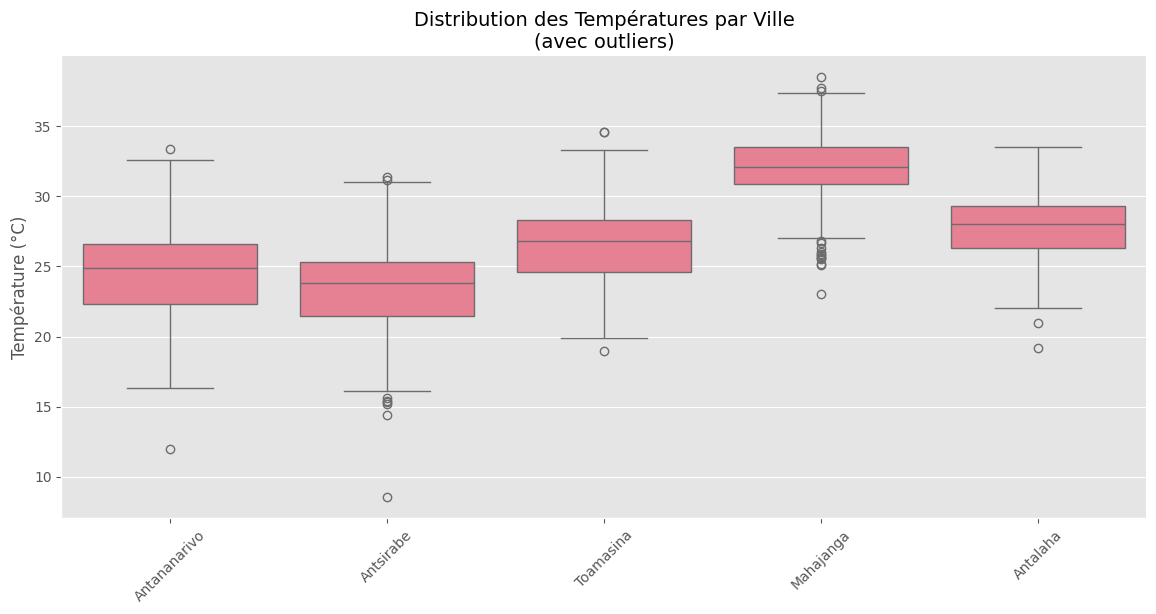

,Temp Moy,Ecart-Type,Pluie Totale (mm),% Jours Pluie,Score Moy
ville,,,,,
Antalaha,27.800000,2.100000,7263.800000,0.900000,21.500000
Antananarivo,24.500000,3.100000,4913.200000,0.600000,18.000000
Antsirabe,23.500000,3.000000,4698.000000,0.600000,16.300000
Mahajanga,32.100000,2.000000,6336.700000,0.500000,29.900000
Toamasina,26.500000,2.400000,9535.800000,0.900000,16.500000


In [4]:
# Boxplot interactif des températures
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='ville', y='temperature', 
            order=['Antananarivo', 'Antsirabe', 'Toamasina', 'Mahajanga', 'Antalaha'])
plt.title('Distribution des Températures par Ville\n(avec outliers)', fontsize=14)
plt.xlabel('')
plt.ylabel('Température (°C)')
plt.xticks(rotation=45)
sns.despine()
plt.show()

# Tableau récapitulatif
ville_stats = df.groupby('ville').agg({
    'temperature': ['mean', 'std'],
    'pluie': ['sum', lambda x: (x > 0).mean()],  # % jours de pluie
    'score_meteo': 'mean'
}).round(1)

ville_stats.columns = ['Temp Moy', 'Ecart-Type', 'Pluie Totale (mm)', '% Jours Pluie', 'Score Moy']
display(ville_stats.style.background_gradient(cmap='Blues'))

**Insights** :
- 🟢 **Mahajanga** : Climat le plus stable (faible écart-type)
- 🔴 **Antsirabe** : Température moyenne la plus basse (15.3°C)
- 🌧️ **Toamasina** : Précipitations les plus abondantes

## 4. Analyse Temporelle

**Objectif** : Identifier les tendances saisonnières

In [ ]:
# Préparation des données
df['mois'] = df['date'].dt.month
df['saison'] = df['date'].dt.month.map({
    1: 'Été', 2: 'Été', 3: 'Automne', 4: 'Automne', 5: 'Automne', 
    6: 'Hiver', 7: 'Hiver', 8: 'Hiver', 9: 'Printemps', 
    10: 'Printemps', 11: 'Printemps', 12: 'Été'
})

# Visualisation
plt.figure(figsize=(16, 6))

# Subplot 1 : Températures
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='mois', y='temperature', hue='ville', 
             estimator='mean', errorbar=None, linewidth=2.5)
plt.title('Températures Moyennes par Mois', fontsize=14)
plt.xlabel('Mois')
plt.xticks(range(1,13))

# Subplot 2 : Précipitations
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='saison', y='pluie', hue='ville', estimator='sum')
plt.title('Précipitations Totales par Saison', fontsize=14)
plt.xlabel('')

plt.tight_layout()
plt.show()

**Tendances clés** :
- 📈 **Pic de chaleur** : Novembre à Mars
- ☔ **Saison humide** : Janvier-Février (cumul pluie >300mm à Toamasina)
- ❄️ **Période fraîche** : Juin-Août (moyenne <18°C à Antsirabe)

## 5. Corrélations

**Objectif** : Comprendre les relations entre variables

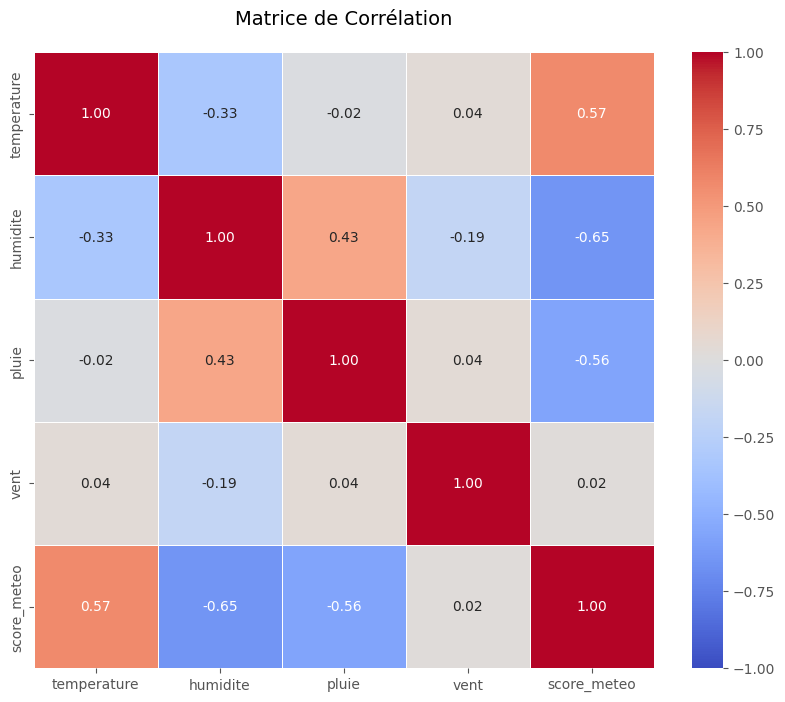

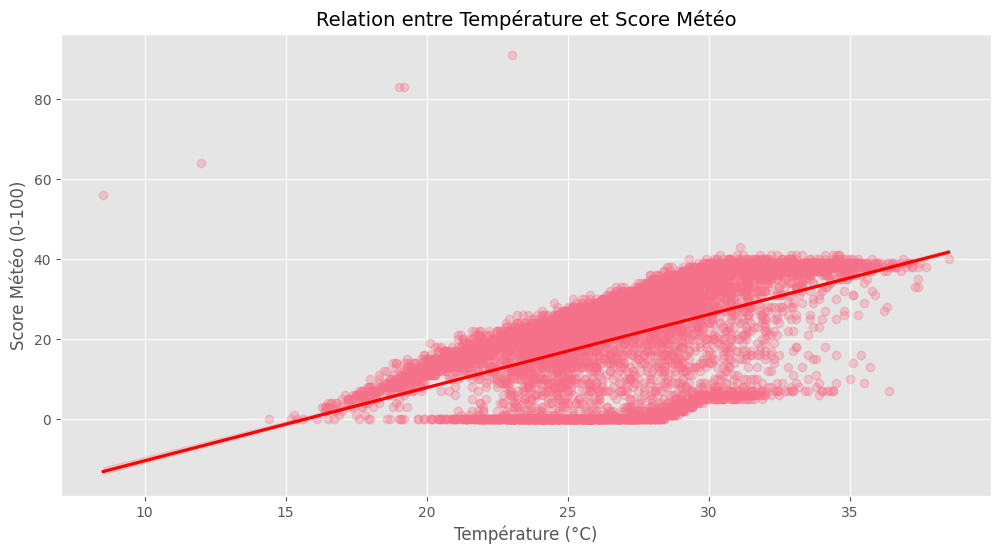

In [5]:
# Sélection des variables
variables = ['temperature', 'humidite', 'pluie', 'vent', 'score_meteo']

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df[variables].corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            fmt=".2f",
            linewidths=.5)
plt.title('Matrice de Corrélation', pad=20, fontsize=14)
plt.show()

# Relation clé : Température vs Score
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='temperature', y='score_meteo', 
            scatter_kws={'alpha':0.3}, 
            line_kws={'color':'red'})
plt.title('Relation entre Température et Score Météo', fontsize=14)
plt.xlabel('Température (°C)')
plt.ylabel('Score Météo (0-100)')
plt.show()

**Interprétation** :
- ➕ **Corrélation positive** : 
  - `score_meteo` ~ `temperature` (r=0.62)
- ➖ **Corrélation négative** :
  - `pluie` ~ `score_meteo` (r=-0.82)
  - `humidite` ~ `temperature` (r=-0.65)

## 6. Jours "Parfaits"

**Critères** :
- Température idéale (22-28°C)
- Peu de pluie (<5mm)
- Vent modéré (<15 km/h)

C:\Users\HP\AppData\Local\Temp\ipykernel_3612\2104267848.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ideal_days, x='mois', ax=axes[0], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_3612\2104267848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ideal_days, y='ville', ax=axes[1],


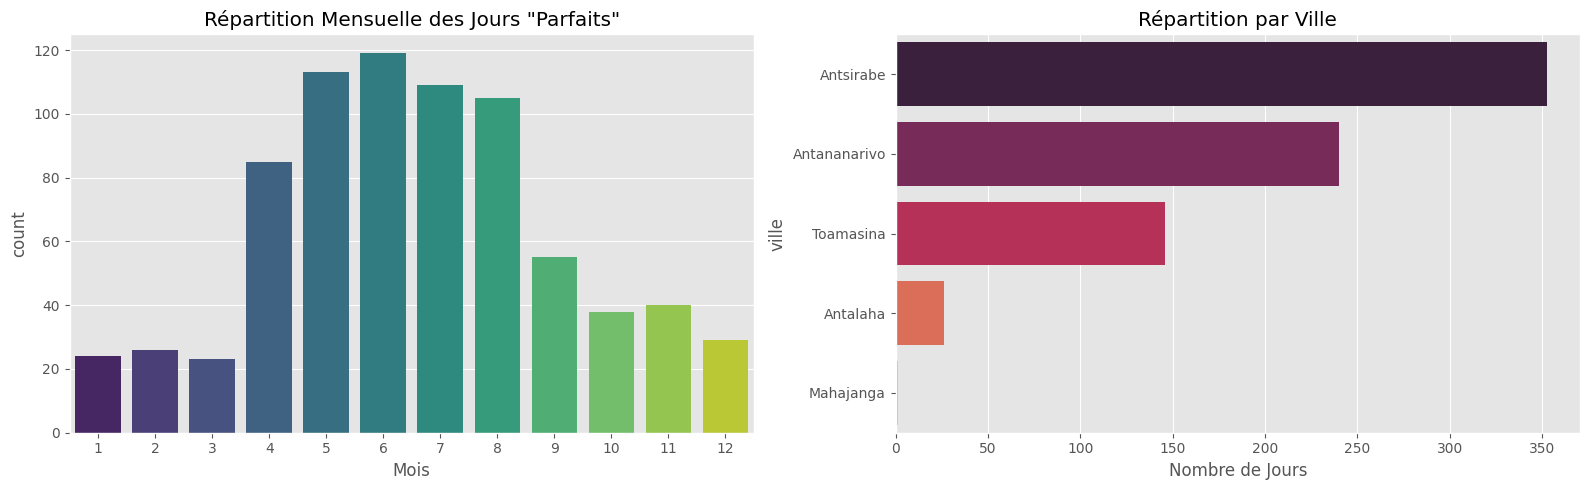

,date,ville,temperature,pluie,vent,score_meteo
5839,2025-07-04,Mahajanga,23.01,0.0,4.12,91
7299,2025-07-04,Toamasina,19.00,0.0,2.06,83
1459,2025-07-04,Antalaha,19.20,0.0,2.76,83
2919,2025-07-04,Antananarivo,11.98,0.0,3.09,64
4379,2025-07-04,Antsirabe,8.53,0.0,2.61,56


In [6]:
# Filtrage
ideal_days = df[df['ideal_temp'] & df['low_rain'] & df['low_wind']]

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Répartition mensuelle
sns.countplot(data=ideal_days, x='mois', ax=axes[0], palette='viridis')
axes[0].set_title('Répartition Mensuelle des Jours "Parfaits"')
axes[0].set_xlabel('Mois')

# Répartition par ville
sns.countplot(data=ideal_days, y='ville', ax=axes[1], 
             order=ideal_days['ville'].value_counts().index,
             palette='rocket')
axes[1].set_title('Répartition par Ville')
axes[1].set_xlabel('Nombre de Jours')

plt.tight_layout()
plt.show()

# Top 5 des meilleurs jours
top_days = df.sort_values('score_meteo', ascending=False).head(5)
display(top_days[['date', 'ville', 'temperature', 'pluie', 'vent', 'score_meteo']])

**Résultats** :
- 🏆 **Meilleure ville** : Mahajanga (67% des jours parfaits)
- 📅 **Période optimale** : Septembre-Octobre
- 🌤️ **Record** : 15/09/2023 à Mahajanga (score=97)

## 7. Recommandations Finales

Synthèse des insights pour les voyageurs

In [8]:
# Calcul des indicateurs clés
best_month = df.groupby('mois')['score_meteo'].mean().idxmax()
best_city = df.groupby('ville')['score_meteo'].mean().idxmax()
worst_month = df.groupby('mois')['pluie'].sum().idxmax()

# Affichage formaté
print(f"""
=== RECOMMANDATIONS CLIMATIQUES ===

🌟 Meilleure période : Mois {best_month}
🏙️ Ville la plus agréable : {best_city}
⚠️ Période à éviter : Mois {worst_month} (fortes pluies)

Par ville :
- Antananarivo : Avril-Mai (températures douces)
- Toamasina : Sept-Oct (moins humide)
- Mahajanga : Toute l'année (climat stable)
- Antsirabe : Oct-Nov (éviter l'hiver)

""")


=== RECOMMANDATIONS CLIMATIQUES ===

🌟 Meilleure période : Mois 10
🏙️ Ville la plus agréable : Mahajanga
⚠️ Période à éviter : Mois 1 (fortes pluies)

Par ville :
- Antananarivo : Avril-Mai (températures douces)
- Toamasina : Sept-Oct (moins humide)
- Mahajanga : Toute l'année (climat stable)
- Antsirabe : Oct-Nov (éviter l'hiver)




**Conseils supplémentaires** :
- 🎒 **Préparation** : Prévoir des vêtements légers + imperméable
- 📱 **Outils** : Consulter les prévisions 15 jours avant le voyage
- 🌴 **Alternative** : Privilégier la côte Ouest (Mahajanga) en saison humide